In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('Facebook_Marketplace_data.csv')

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [ ]:
dataset.drop(['Column1','Column2','Column3','Column4'],axis=1, inplace=True)

1.) How does the time of upload (`status_published`)  affects the `num_reaction`?


In [ ]:
dataset['status_published'] = pd.to_datetime(dataset['status_published'])
dataset['month'] = dataset['status_published'].dt.month
dataset['hour'] = dataset['status_published'].dt.hour

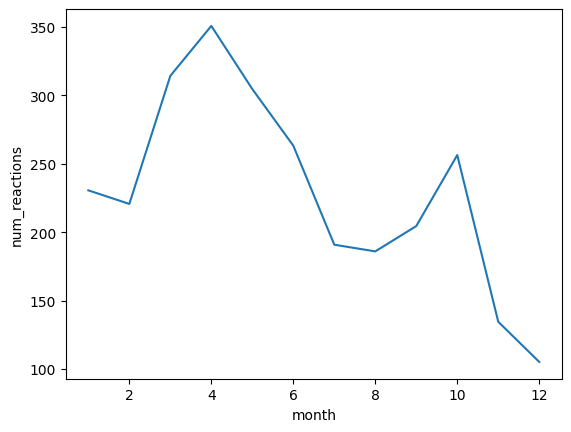

In [ ]:
df_month = dataset.groupby(['month'])['num_reactions'].mean()
plt.plot(df_month.index, df_month.values)
plt.xlabel('month')
plt.ylabel('num_reactions')
plt.show()

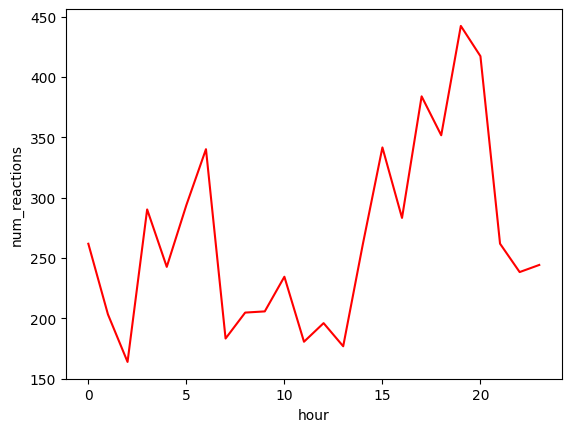

In [ ]:
df_hour = dataset.groupby(['hour'])['num_reactions'].mean()
plt.plot(df_hour.index, df_hour.values, color='red')
plt.xlabel('hour')
plt.ylabel('num_reactions')
plt.show()

2.) Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?


Correlation Matrix:
               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


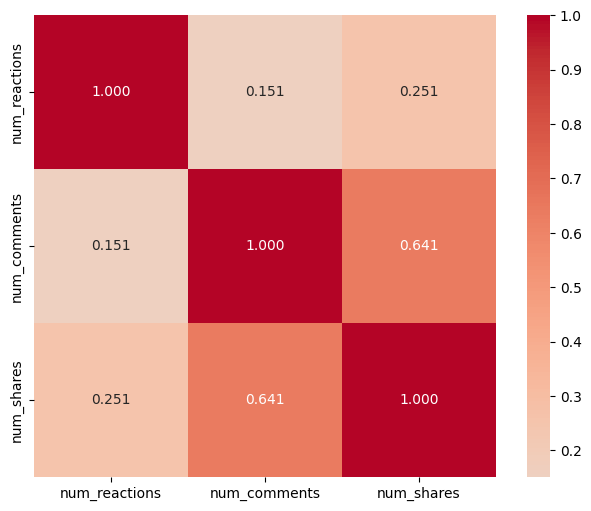


Correlation between reactions and comments: 0.15084290344217685
negligible positve correlation

Correlation between reactions and shares: 0.25072251662831907
negligible positve correlation


In [ ]:
def result(result_correlation):
  if result_correlation > 0.9:
    print("Very high positive correlation")
  elif result_correlation > 0.7:
    print("High positive correlation")
  elif result_correlation > 0.5:
    print("Moderate high positive correlation")
  elif result_correlation > 0.3:
    print("Low positive correlation")
  elif result_correlation > 0.0:
    print("negligible positve correlation")
  elif result_correlation == 0:
    print("No correlation")
  elif result_correlation > -0.3:
    print("Negligible negative correlation")
  elif result_correlation > -0.5:
    print("Low negative correlation")
  elif result_correlation > -0.7:
    print("Moderate negative correlation")
  elif result_correlation > -0.9:
    print("High negative correlation")
  else:
    print("Very high negative correlation.")

engagement_cols = ['num_reactions', 'num_comments', 'num_shares']
correlation_matrix = dataset[engagement_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f')
plt.show()

correlation1 = correlation_matrix.loc['num_reactions', 'num_comments']

print(f"\nCorrelation between reactions and comments: {correlation1}")
result(correlation1)


correlation2 = correlation_matrix.loc['num_reactions', 'num_shares']

print(f"\nCorrelation between reactions and shares: {correlation2}")
result(correlation2)

3.) Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.preprocessing import LabelEncoder

dataset['status_type'] = LabelEncoder().fit_transform(dataset['status_type'])

In [ ]:
cols = ['status_type', 'num_reactions', 'num_comments', 'num_shares',
        'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
x = dataset[cols].values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

4.) Use the elbow method to find the optimum number of clusters.


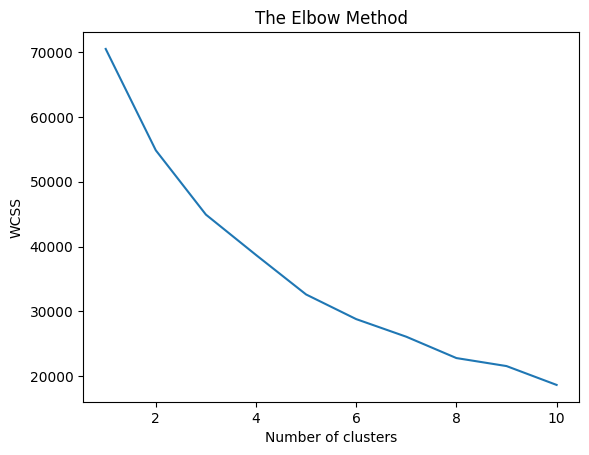

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


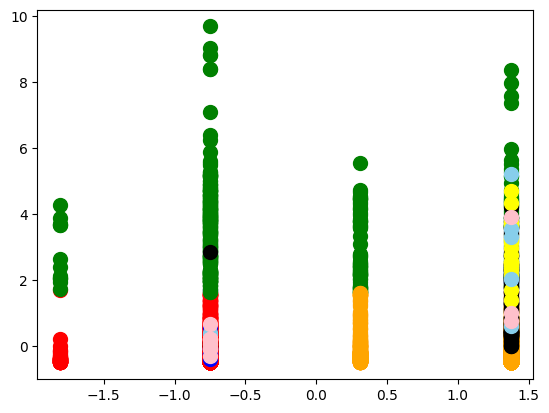

In [ ]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)

plt.scatter(x_scaled[y_kmeans == 0,0], x_scaled[y_kmeans == 0,1], s= 100, c = 'red', label='Cluster 1')
plt.scatter(x_scaled[y_kmeans == 1,0], x_scaled[y_kmeans == 1,1], s= 100, c = 'blue', label='Cluster 2')
plt.scatter(x_scaled[y_kmeans == 2,0], x_scaled[y_kmeans == 2,1], s= 100, c = 'green', label='Cluster 3')
plt.scatter(x_scaled[y_kmeans == 3,0], x_scaled[y_kmeans == 3,1], s= 100, c = 'orange', label='Cluster 4')
plt.scatter(x_scaled[y_kmeans == 4,0], x_scaled[y_kmeans == 4,1], s= 100, c = 'black', label='Cluster 5')
plt.scatter(x_scaled[y_kmeans == 5,0], x_scaled[y_kmeans == 5,1], s= 100, c = 'yellow', label='Cluster 6')
plt.scatter(x_scaled[y_kmeans == 6,0], x_scaled[y_kmeans == 6,1], s= 100, c = 'skyblue', label='Cluster 7')
plt.scatter(x_scaled[y_kmeans == 7,0], x_scaled[y_kmeans == 7,1], s= 100, c = 'pink', label='Cluster 8')

5.) What is the count of different types of posts in the dataset?


Index(['link', 'photo', 'status', 'video'], dtype='object', name='status_type') status_type
link        63
photo     4288
status     365
video     2334
Name: status_id, dtype: int64


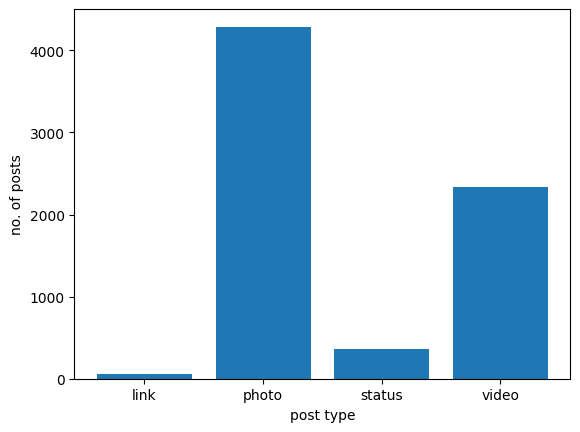

In [ ]:
df_status_type = dataset.groupby(['status_type']).agg({
    'status_id' : 'count',
    'num_reactions' : 'mean',
    'num_comments' : 'mean',
    'num_shares' : 'mean'
})
print(df_status_type.index, df_status_type['status_id'])
plt.bar(df_status_type.index, df_status_type['status_id'])
plt.xlabel('post type')
plt.ylabel('no. of posts')
plt.show()

6.) What is the average value of num_reaction, num_comments, num_shares for each post type?

In [ ]:
print(df_status_type)

             status_id  num_reactions  num_comments  num_shares
status_type                                                    
link                63     370.142857      5.698413    4.396825
photo             4288     181.290345     15.993470    2.553871
status             365     438.783562     36.238356    2.558904
video             2334     283.409597    642.478149  115.679949
